#Computer Vision Fall 2022 - HW-1, Question-1
@author: Shri Ramya Ashok
#1)Compute Histogram for image recognition 

In some functions, I have considered 2 pr 10 images to demontrate the logic since considering 600 images were making notbook to get into RAM overload issue.

###Step 1: Unzip the dataset

In [ ]:
!unzip '/content/NWPU-RESISC45.zip'

###Step 2: Extract 40 images from 15 categories and store them in the traiing dataset. Create y_train as well. The dataset is labelled from 0-14 (total 15 unique classes)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder = '/content/NWPU-RESISC45'
x_train=[]
y_train=[]
y_class=0
label_map = {}
sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

target_folder = '/content/CV_Dataset/'

#extract 40 images from first 15 classes. Total 600 images
for sub_folder in sub_folders[:15]:
  label_map.update({y_class:sub_folder})
  count = 40
  for image in os.listdir(folder+'/'+sub_folder):
    if (count>0):
      x_train.append(plt.imread(folder+'/'+sub_folder+'/'+image))
      y_train.append(y_class)
      count-=1
    else:
      break
  y_class+=1

In [ ]:
print("The number of images in the newly created dataset are: ",len(x_train))
print("The number of labels in the newly created dataset are: ", len(y_train))
print("The shape of each image is: ", x_train[0].shape)
print("Dataset label maps: ", label_map)

The number of images in the newly created dataset are:  600
The number of labels in the newly created dataset are:  600
The shape of each image is:  (256, 256, 3)
Dataset label maps:  {0: 'medium_residential', 1: 'basketball_court', 2: 'commercial_area', 3: 'airplane', 4: 'mobile_home_park', 5: 'meadow', 6: 'overpass', 7: 'intersection', 8: 'river', 9: 'bridge', 10: 'palace', 11: 'ground_track_field', 12: 'harbor', 13: 'mountain', 14: 'terrace'}


##A) Compute a HSV Kmeans model with total number of entry K=[64, 128] implementing in matlab (or python) and show your code and results

KMeans to find the color table. Palette in the code is the resultant color table. I was running into RAM overlaod issue in google colab. So I have considered only first 10 images for the analysis. To consider all the images select x_train instead of x_train[:10]

In [ ]:
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imageio import imread
from skimage.transform import resize
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex

# function that returns the color table. Due to RAM overload in google colab, I have taken only first 10 images to determine color palette.
def kmeans(clusters):
  #fix randon seed
  np.random.seed(0)
  data=pd.DataFrame()
  #Change x_train[:10] to x_train to consider all the iamges for analysis
  for image in x_train[:10]:
    temp_data = pd.DataFrame(image.reshape(-1, 3), columns=['R', 'G', 'B'])
    data = data.append(temp_data)
  # Read image file as 2-D array of RGB values
  kmeans = KMeans(n_clusters=64, random_state=0)
  data['Cluster'] = kmeans.fit_predict(data)

  palette = kmeans.cluster_centers_
  print("Color table for Kmeans with ", clusters, "clusters is", palette)
  return palette

#K=64
palette = kmeans(64)
#K=128
kmeans(128)

Color table for Kmeans with  64 clusters is [[125.40856393 125.04679699 111.91605314]
 [ 49.88816552  51.72817266  48.79916169]
 [ 82.75826586  84.60264845  79.96120108]
 [163.35623679 171.70348837 167.39614165]
 [ 32.80180564  33.59884167  32.26479857]
 [112.05733064 101.11648129  83.24539939]
 [ 78.25432734  75.91922308  60.58269066]
 [225.23816568 231.68786982 226.74630178]
 [  4.04835307   5.44994321   2.45692033]
 [149.00969069 156.04062127 146.84853312]
 [103.19963322  95.06549646  77.82342154]
 [193.12924885 194.23961393 174.19345363]
 [ 60.055945    73.29205985  53.52278242]
 [133.02262611 138.25667656 130.15417903]
 [118.65258658 115.26641067  97.37501811]
 [ 41.0628354   42.61830422  41.09181384]
 [ 75.50998233  85.60882372  66.14341821]
 [ 20.30677694  22.46248629  15.7661406 ]
 [ 98.0449099  101.9649967   98.46174167]
 [ 39.49326968  51.72194397  34.69024887]
 [156.44125561 163.67149263 154.30621397]
 [152.06806084 137.98174905 115.36045627]
 [ 71.30037839  72.24160696  67.

array([[125.40856393, 125.04679699, 111.91605314],
       [ 49.88816552,  51.72817266,  48.79916169],
       [ 82.75826586,  84.60264845,  79.96120108],
       [163.35623679, 171.70348837, 167.39614165],
       [ 32.80180564,  33.59884167,  32.26479857],
       [112.05733064, 101.11648129,  83.24539939],
       [ 78.25432734,  75.91922308,  60.58269066],
       [225.23816568, 231.68786982, 226.74630178],
       [  4.04835307,   5.44994321,   2.45692033],
       [149.00969069, 156.04062127, 146.84853312],
       [103.19963322,  95.06549646,  77.82342154],
       [193.12924885, 194.23961393, 174.19345363],
       [ 60.055945  ,  73.29205985,  53.52278242],
       [133.02262611, 138.25667656, 130.15417903],
       [118.65258658, 115.26641067,  97.37501811],
       [ 41.0628354 ,  42.61830422,  41.09181384],
       [ 75.50998233,  85.60882372,  66.14341821],
       [ 20.30677694,  22.46248629,  15.7661406 ],
       [ 98.0449099 , 101.9649967 ,  98.46174167],
       [ 39.49326968,  51.72194

Now get HSV table of all the images

In [ ]:
import matplotlib

for single_image in x_train[0:2]:
  print(single_image)
  single_image = matplotlib.colors.rgb_to_hsv(single_image)
  print(single_image)

[[[ 93  93  83]
  [ 92  92  82]
  [ 84  84  74]
  ...
  [ 99 103  88]
  [ 89  93  79]
  [ 85  89  75]]

 [[ 83  83  73]
  [ 85  85  75]
  [ 82  82  72]
  ...
  [107 109  95]
  [ 86  90  75]
  [ 68  72  57]]

 [[105 105  95]
  [ 99  99  89]
  [ 83  83  73]
  ...
  [ 95  98  81]
  [ 91  94  77]
  [ 82  85  68]]

 ...

 [[ 48  45  38]
  [ 53  50  43]
  [ 57  54  47]
  ...
  [ 66  65  47]
  [ 70  71  53]
  [ 92  93  75]]

 [[ 41  38  31]
  [ 46  43  36]
  [ 51  48  41]
  ...
  [ 62  63  45]
  [ 64  65  47]
  [ 78  79  61]]

 [[ 33  30  23]
  [ 37  34  27]
  [ 42  39  32]
  ...
  [ 69  70  52]
  [ 67  68  50]
  [ 70  71  53]]]
[[[1.6666667e-01 1.0752688e-01 9.3000000e+01]
  [1.6666667e-01 1.0869565e-01 9.2000000e+01]
  [1.6666667e-01 1.1904762e-01 8.4000000e+01]
  ...
  [2.1111111e-01 1.4563107e-01 1.0300000e+02]
  [2.1428572e-01 1.5053764e-01 9.3000000e+01]
  [2.1428572e-01 1.5730338e-01 8.9000000e+01]]

 [[1.6666667e-01 1.2048193e-01 8.3000000e+01]
  [1.6666667e-01 1.1764706e-01 8.5000000

##B) HSV Histogram of images

As an example I have computed HSV histogram for only 2 images. 

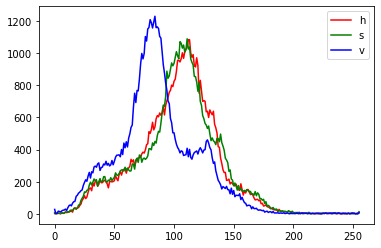

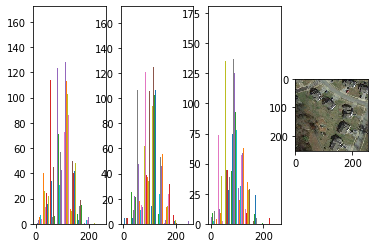

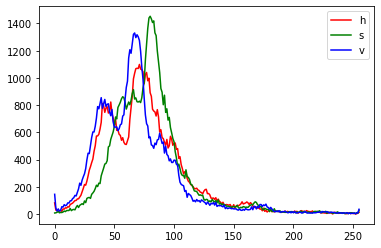

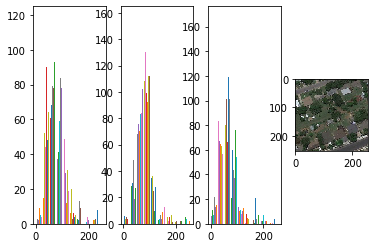

In [ ]:
for image in x_train[0:2]:
    h, s, v = image[:,:,0], image[:,:,1], image[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()
    fig, axs = plt.subplots(1, 4)
    axs[0].hist(h)
    axs[1].hist(s)
    axs[2].hist(v)
    plt.imshow(image, interpolation='nearest')
    plt.show()

##B) Bonus: Euclidean and KL distance

For demonstration purpose, only two images are considered.

In [ ]:
from scipy.spatial.distance import cdist
from scipy.stats import entropy

#for demostration pupose, only first two images are considered
def getDist(opt):
  #Euclidian distance
  if opt=='euc':
    for image in x_train[:2]:
      im = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
      dist = cdist(palette, im.reshape(256*256, 3))
      print("The Euclidian distance is: ", dist)
      #KL distance
  if opt=='kl_distance':
    for image in x_train[:2]:
      im = im = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
      im = np.resize(im, (8,8,3))
      kl_dist = entropy(palette, im.reshape(8*8, 3), base=2)
      print("The KL distance is: ", kl_dist)

getDist('euc')
getDist('kl_distance')

The Euclidian distance is:  [[138.10787645 137.54099044 137.53542712 ... 118.18899933 117.9326782
  118.34230456]
 [ 54.41264337  53.14957889  45.89936419 ...  31.1953052   30.87767839
   31.44845129]
 [ 79.19286585  78.30853789  76.03417475 ...  54.96986092  54.72768787
   55.14497714]
 ...
 [151.25998146 150.7291748  150.94709994 ... 131.83107437 131.57065198
  131.98382485]
 [ 62.82597676  61.59865074  53.93161872 ...  40.73331069  40.07222769
   41.13286014]
 [ 85.7374899   84.91959411  77.58028519 ...  81.30983909  81.1426553
   81.43015194]]
The Euclidian distance is:  [[122.76631448 122.76631448 122.76631448 ... 146.01574924 143.77345792
  146.11317319]
 [150.38845656 150.38845656 150.38845656 ...  85.42766288  77.14856745
   69.3978092 ]
 [122.41949508 122.41949508 122.41949508 ...  97.27286191  92.08526154
   90.66288837]
 ...
 [127.45806219 127.45806219 127.45806219 ... 158.00384077 156.13666671
  158.89361129]
 [159.80858372 159.80858372 159.80858372 ...  94.8709375   86.429

##C) Image Recognition Experiment

Overall accuracy = 37.33%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def getHist(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([hsv], [0, 1, 2], None, (8,8,8),[0, 180, 0, 256, 0, 256])
  return hist.flatten()
   
def knnClassify():
  labels=[]
  features=[]
  for image, label in zip(x_train, y_train):
    labels.append(label)
    features.append(getHist(image))
  
  (trainFeat, testFeat, trainLabels, testLabels) = train_test_split(
	features, labels, test_size=0.25, random_state=42)
  model = KNeighborsClassifier(n_neighbors=2)
  model.fit(trainFeat, trainLabels)
  acc = model.score(testFeat, testLabels)
  print("KNN Classification accuracy using HSV histogram features is: {:.2f}%".format(acc * 100))

knnClassify()

KNN Classification accuracy using HSV histogram features is: 37.33%
